## Analysis

In [1]:
import pandas as pd
df = pd.read_csv('data/quotesByAgeGender.csv', index_col='person_id')
df

,age,gender,mean_quote
person_id,,,
1,18,female,4473.064815
2,18,male,5417.351852
3,19,female,3516.472222
4,19,male,4139.018519
5,20,female,3104.675926
...,...,...,...
160,96,male,3397.111111
161,97,female,3532.000000
162,97,male,3419.861111


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 14})

### Summary of all mean quotes

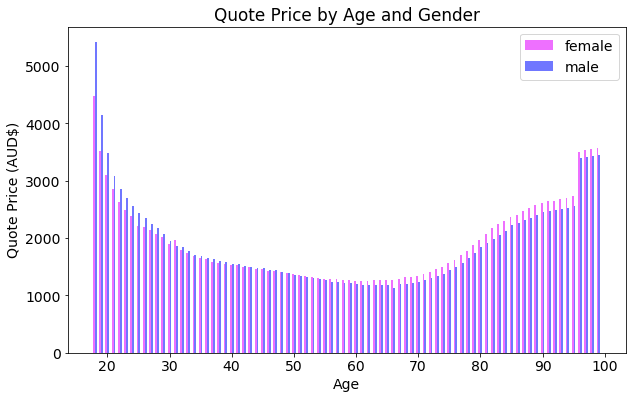

In [3]:
female_fltr = (df['gender'] == 'female')
male_fltr = (df['gender'] == 'male')

x_indexes = df['age'].unique()
width = 0.3

plt.bar(x_indexes - (width/2), df[female_fltr]['mean_quote'], width=width, color='#ee70ff', label="female")
plt.bar(x_indexes + (width/2), df[male_fltr]['mean_quote'], width=width, color='#7077ff', label="male")

plt.legend()
plt.title("Quote Price by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Quote Price (AUD$)")

plt.savefig('plots/allQuotes.png')
plt.show()

### Quote price by age

In [4]:
mq_byage = df.groupby('age')['mean_quote'].mean()
mq_byage = mq_byage.to_frame()
mq_byage.reset_index(inplace=True)
mq_byage.head(5)

,age,mean_quote
0,18,4945.208333
1,19,3827.745370
2,20,3296.194444
3,21,2965.990741
4,22,2743.148148


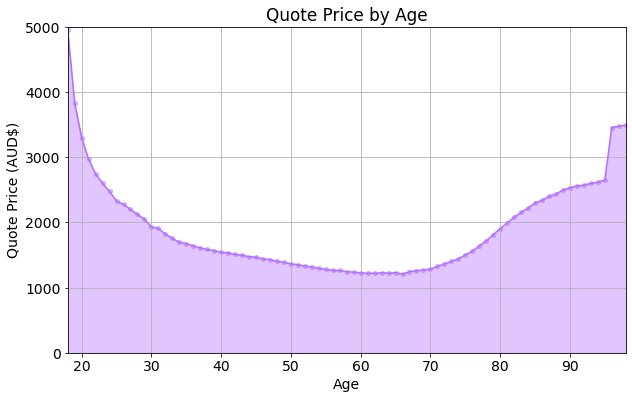

In [11]:
fig, ax = plt.subplots()
ax.plot(mq_byage['age'], mq_byage['mean_quote'], color='#b370ff')
ax.scatter(mq_byage['age'], mq_byage['mean_quote'], c='#b370ff', marker='o', s=16, alpha=0.5)
ax.fill_between(mq_byage['age'], mq_byage['mean_quote'], color='#b370ff', alpha=0.4)
ax.set_title('Quote Price by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Quote Price (AUD$)')
ax.set_xlim(18, 98)
ax.set_ylim(0, 5000)
ax.grid(True)

plt.savefig('plots/qpByAge.png')
plt.show()



### Quote price by gender

In [6]:
mq_bygender = df.groupby('gender')['mean_quote'].mean()
mq_bygender = mq_bygender.to_frame()
mq_bygender.reset_index(inplace=True)
mq_bygender

,gender,mean_quote
0,female,1934.182348
1,male,1912.868015


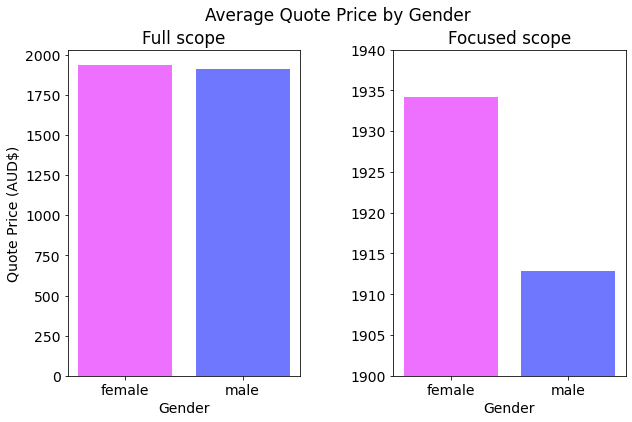

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Average Quote Price by Gender')

ax1.bar(mq_bygender['gender'], mq_bygender['mean_quote'], color=('#ee70ff', '#7077ff'))
ax1.set_title('Full scope')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Quote Price (AUD$)')

ax2.bar(mq_bygender['gender'], mq_bygender['mean_quote'], color=('#ee70ff', '#7077ff'))
ax2.set_title('Focused scope')
ax2.set_xlabel('Gender')
ax2.set_ylim([1900, 1940])

plt.subplots_adjust(wspace=0.4)

plt.savefig('plots/avgByGender.png')
plt.show()

### Quote price by age and gender

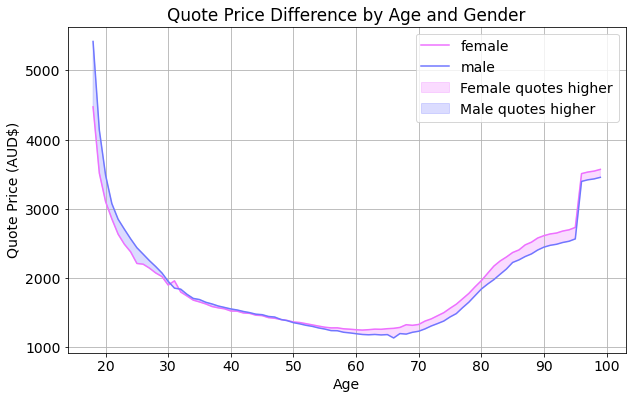

In [8]:
import numpy as np

ages = np.sort(df['age'].unique())
df.sort_values(by=['age'], inplace=True)

female_fltr = (df['gender'] == 'female')
mq_female = (df[female_fltr]['mean_quote']).reset_index(drop=True)
male_fltr = (df['gender'] == 'male')
mq_male = (df[male_fltr]['mean_quote']).reset_index(drop=True)

plt.plot(ages, mq_female, color='#ee70ff', label="female")
plt.plot(ages, mq_male, color='#7077ff', label="male")

plt.fill_between(ages, mq_female, mq_male, alpha=0.25, color='#ee70ff', where=(mq_female > mq_male), interpolate=True, label="Female quotes higher")
plt.fill_between(ages, mq_female, mq_male, alpha=0.25, color='#7077ff', where=(mq_female < mq_male), interpolate=True, label="Male quotes higher")

plt.legend()
plt.title("Quote Price Difference by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Quote Price (AUD$)")
plt.grid(True)

plt.savefig('plots/qpDiffByAgeGender.png')
plt.show()

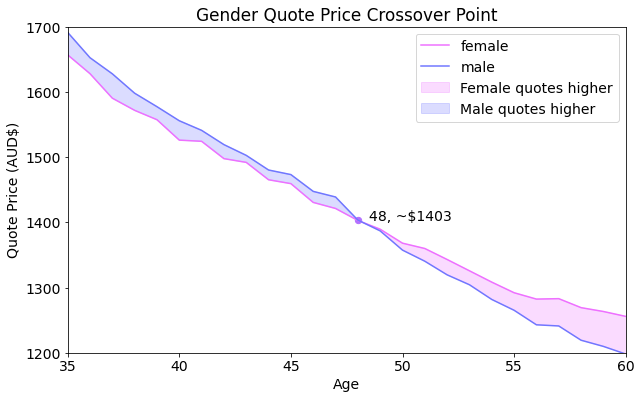

In [9]:
plt.plot(ages, mq_female, color='#ee70ff', label="female")
plt.plot(ages, mq_male, color='#7077ff', label="male")

plt.fill_between(ages, mq_female, mq_male, alpha=0.25, color='#ee70ff', where=(mq_female > mq_male), interpolate=True, label="Female quotes higher")
plt.fill_between(ages, mq_female, mq_male, alpha=0.25, color='#7077ff', where=(mq_female < mq_male), interpolate=True, label="Male quotes higher")

plt.legend()
plt.title("Gender Quote Price Crossover Point")
plt.xlabel("Age")
plt.ylabel("Quote Price (AUD$)")
plt.xlim([35, 60])
plt.ylim([1200, 1700])

plt.scatter(48, 1403, c='#b370ff', marker='o', s=40)
plt.annotate('48, ~$1403', (48.5, 1403))

plt.savefig('plots/qpGenderCrossover.png')
plt.show()

The SVG produced and embedded in the notebook appears broken when displaying on GitHub. Here it is again embedded in markdown, so this graph may appear twice for some readers:
![crossover_point](https://raw.githubusercontent.com/lukedavoli/Car_Insurance_Analysis/master/plots/qpGenderCrossover.png)
